In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', None)
pd.set_option('max_rows',35)
pd.set_option("precision",2)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16))
import scipy.stats as stats
import re

<Figure size 1296x1152 with 0 Axes>

In [66]:
df= pd.read_csv("training_data.csv")
df = df.drop(['id','diagnosis_date'], axis=1)
# Convert all the following into categorical variables: 
df['race'] = df['race'].astype("object")
df['family_history'] = df['family_history'].astype('object')
df['first_degree_history'] = df['first_degree_history'].astype('object')
df['previous_cancer'] = df['previous_cancer'].astype('object')
df['smoker'] = df['smoker'].astype('object')
df['rd_thrpy'] = df['rd_thrpy'].astype('object')
df['h_thrpy'] = df['h_thrpy'].astype('object')
df['chm_thrpy'] = df['chm_thrpy'].astype('object')
df['cry_thrpy'] = df['cry_thrpy'].astype('object')
df['brch_thrpy'] = df['brch_thrpy'].astype('object')
df['rad_rem'] = df['rad_rem'].astype('object')
df['rd_thrpy'] = df['rd_thrpy'].astype('object')
df['multi_thrpy'] = df['multi_thrpy'].astype('object')
df['survival_1_year'] = df['survival_1_year'].astype('object')
df['survival_7_years'] = df['survival_7_years'].astype('object')

df['height']= df['height'].fillna(df['height'].mean())
df['weight']=df['weight'].fillna(df['weight'].mean())
df['BMI'] = df['weight']/(df['height'] * df['height'])
df['family_history'] = df['family_history'].fillna("0")
df['first_degree_history'] = df['first_degree_history'].fillna("0")
df['previous_cancer'] = df['previous_cancer'].fillna("0")
df['smoker'] = df['smoker'].fillna("0")

df['tumor_6_months'] = df['tumor_6_months'].fillna((df['tumor_1_year'] - ((df['tumor_1_year']-df['tumor_diagnosis'])/2)))
df['tumor_1_year'] = df['tumor_1_year'].fillna((df['tumor_6_months'] + ((df['tumor_6_months']-df['tumor_diagnosis']))))
df['tumor_diagnosis'] = df['tumor_diagnosis'].fillna((df['tumor_6_months'] - ((df['tumor_1_year']-df['tumor_6_months']))))

df['psa_6_months'] = df['psa_6_months'].fillna((df['psa_1_year'] - ((df['psa_1_year']-df['psa_diagnosis'])/2)))
df['psa_1_year'] = df['psa_1_year'].fillna((df['psa_6_months'] + ((df['psa_6_months']-df['psa_diagnosis']))))
df['psa_diagnosis'] = df['psa_diagnosis'].fillna((df['psa_6_months'] - ((df['psa_1_year']-df['psa_6_months']))))
duration = []
for x in range(0,len(df)):
    if df['survival_1_year'][x]==0:
        duration.append(1)
    else:
        duration.append(7)
df['duration'] = duration    
#drop
df = df.drop(['symptoms','tea','height','weight','stage','gleason_score','tumor_diagnosis',
            'tumor_6_months','tumor_1_year','psa_diagnosis','psa_6_months','psa_1_year',
             'age','race','smoker','previous_cancer','survival_1_year','family_history'],axis=1)
#df = df.dropna()
# new variables added: 



 

In [67]:
df.dtypes

t_score                  object
n_score                  object
m_score                  object
first_degree_history     object
side                     object
rd_thrpy                 object
h_thrpy                  object
chm_thrpy                object
cry_thrpy                object
brch_thrpy               object
rad_rem                  object
multi_thrpy              object
survival_7_years         object
BMI                     float64
duration                  int64
dtype: object

In [10]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()


gleason_score         float64
age                   float64
tumor_diagnosis       float64
tumor_6_months        float64
tumor_1_year          float64
                       ...   
brch_thrpy_1            int64
rad_rem_1               int64
multi_thrpy_1           int64
survival_1_year_1       int64
survival_7_years_1      int64
Length: 1227, dtype: object

In [68]:
df = pd.get_dummies(df, drop_first=True, dtype='int')

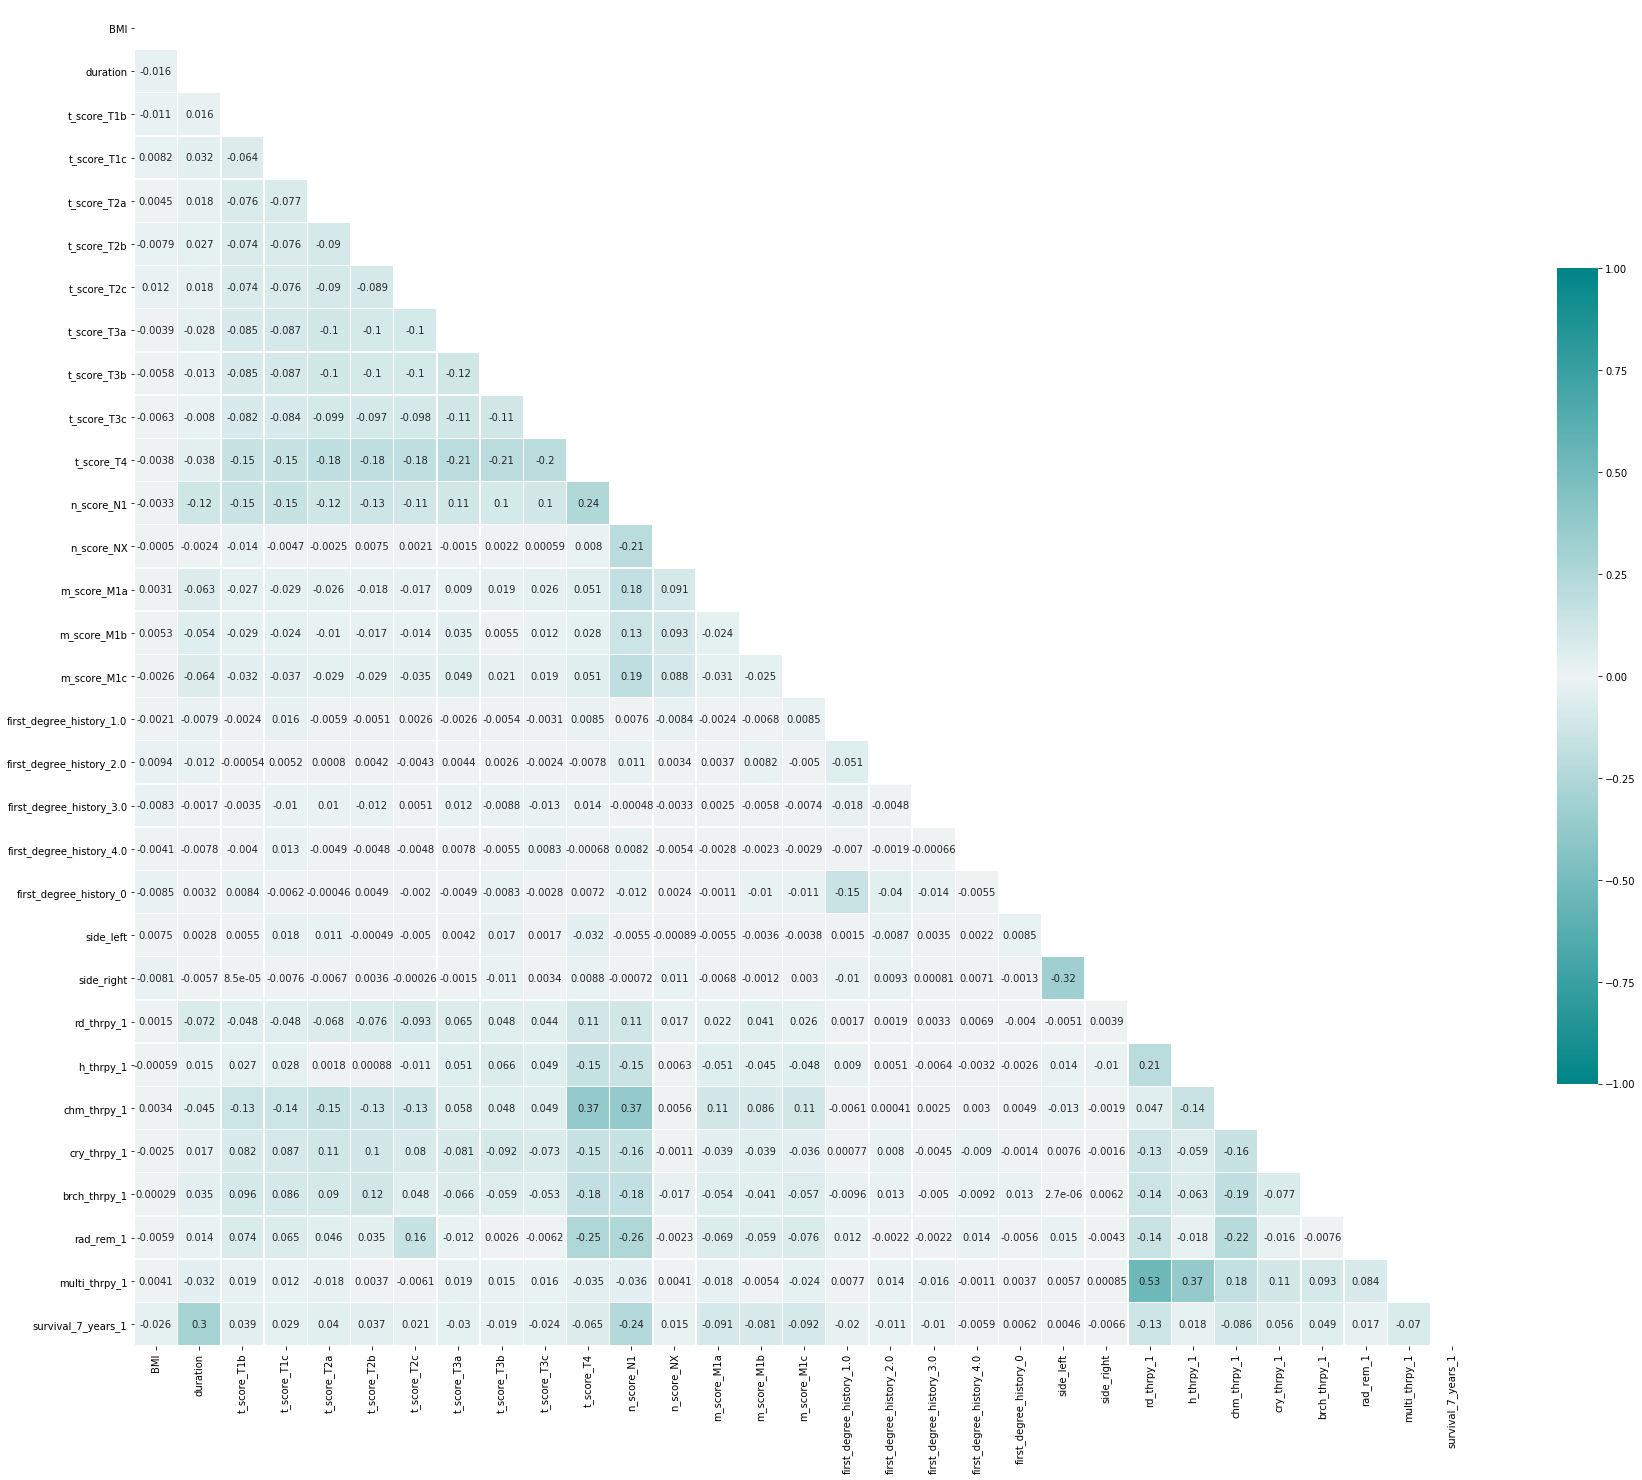

In [69]:
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(195, 195, s=100, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [71]:
cph = cph.fit(df, duration_col='duration',event_col='survival_7_years_1')

/Applications/anaconda/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:1090: ConvergenceWarning: Column(s) ['BMI'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


In [119]:
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 15385 total observations, 8734 right-censored observations>
             duration col = 'duration'
                event col = 'survival_7_years_1'
      baseline estimation = breslow
   number of observations = 15385
number of events observed = 6651
   partial log-likelihood = -60933.45
         time fit was run = 2021-03-22 03:11:05 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
BMI                      -11.98       0.00       4.09           -20.01            -3.96                 0.00                 0.02
t_score_T1b                0.03       1.03       0.07            -0.10             0.16                 0.91                 1.18
t_score_T1c               -0.06       0.95       0.07            -0.18             0.07                 0.83                 1.08
t_score_T2a                0.05       1.05       0.06            -0.07             0.17                 0.93                 1.19
t_score_T2b                0.00       1.00       0.06            -0.12             0.13                 0.89                 1.13
t_score_T2c               -0.02       0.98       0.06            -0.14             0.10                 0.87                 1.11
t_score_T3a                0.06       1.06       0.06            -0.07             0.18                 0.93                 1.20
t_score_T3b                0.06       1.06       0.06            -0.06             0.18                 0.94                 1.20
t_score_T3c                0.04       1.05       0.06            -0.08             0.17                 0.92                 1.19
t_score_T4                -0.03       0.97       0.06            -0.15             0.08                 0.86                 1.08
n_score_N1                -0.76       0.47       0.04            -0.84            -0.69                 0.43                 0.50
n_score_NX                 0.00       1.00       0.04            -0.08             0.08                 0.92                 1.09
m_score_M1a               -0.75       0.47       0.12            -0.99            -0.52                 0.37                 0.60
m_score_M1b               -0.94       0.39       0.16            -1.24            -0.64                 0.29                 0.53
m_score_M1c               -0.68       0.51       0.11            -0.90            -0.46                 0.41                 0.63
first_degree_history_1.0  -0.07       0.93       0.03            -0.14            -0.00                 0.87                 1.00
first_degree_history_2.0  -0.08       0.92       0.11            -0.30             0.14                 0.74                 1.15
first_degree_history_3.0  -0.44       0.65       0.35            -1.13             0.26                 0.32                 1.29
first_degree_history_4.0  -0.05       0.95       1.00            -2.01             1.91                 0.13                 6.77
first_degree_history_0    -0.01       0.99       0.04            -0.09             0.07                 0.92                 1.07
side_left                 -0.00       1.00       0.03            -0.06             0.06                 0.94                 1.07
side_right                -0.01       0.99       0.03            -0.07             0.04                 0.93                 1.04
rd_thrpy_1                -0.24       0.78       0.03            -0.31            -0.18                 0.74                 0.84
h_thrpy_1                  0.01       1.01       0.03            -0.05             0.07                 0.95                 1.08
chm_thrpy_1                0.04       1.04       0.03            -0.03             0.10                 0.97                 1.11
cry_thrpy_1                0.02       1.02       0.03            -0.04             0.09                 0.96

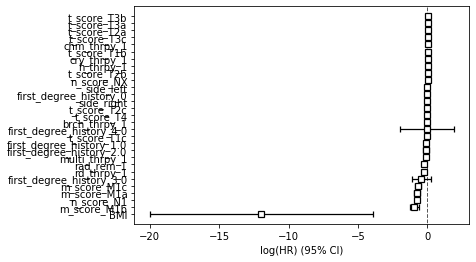

In [73]:
cph.plot()

In [99]:
pred = cph.predict_survival_function(test)

In [102]:
pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [111]:
pred.iloc[1][4]

0.4930476232054362

In [112]:
survival_7_years = []
for x in range(0,len(pred.iloc[1])):
    if pred.iloc[1][x] >=0.5:
        survival_7_years.append(1)
    else:
        survival_7_years.append(0)

In [115]:
test['survival_7_years'] = survival_7_years

In [116]:
test.to_csv('test.csv')

In [114]:
test = pd.read_csv("(sanyuja)_score.csv")

In [75]:
test.columns

Index(['id', 'diagnosis_date', 'gleason_score', 't_score', 'n_score',
       'm_score', 'stage', 'age', 'race', 'height', 'weight', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'tumor_diagnosis', 'tumor_6_months', 'tumor_1_year', 'psa_diagnosis',
       'psa_6_months', 'psa_1_year', 'tea', 'symptoms', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy',
       'survival_1_year', 'survival_7_years'],
      dtype='object')

In [76]:
for x in test.columns:
    print(x, len(test[test[x].isna()]) / len(df) *100)

id 0.0
diagnosis_date 0.0
gleason_score 1.5534611634709132
t_score 0.0
n_score 0.0
m_score 0.0
stage 0.0
age 4.211894702632434
race 0.7864803379915501
height 6.779330516737081
weight 6.766330841728957
family_history 7.611309717257068
first_degree_history 7.611309717257068
previous_cancer 7.611309717257068
smoker 7.611309717257068
side 0.0
tumor_diagnosis 1.3649658758531036
tumor_6_months 49.10627234319142
tumor_1_year 10.425739356516086
psa_diagnosis 6.6883327916802084
psa_6_months 46.4478388040299
psa_1_year 12.447188820279493
tea 7.611309717257068
symptoms 2.105947351316217
rd_thrpy 0.0
h_thrpy 0.0
chm_thrpy 0.0
cry_thrpy 0.0
brch_thrpy 0.0
rad_rem 0.0
multi_thrpy 0.0
survival_1_year 37.13357166070848
survival_7_years 74.94962625934352


In [78]:
test = pd.read_csv("(sanyuja)_score.csv")
test = test.drop(['id','diagnosis_date'], axis=1)
# Convert all the following into categorical variables: 
test['race'] = test['race'].astype("object")
test['family_history'] = test['family_history'].astype('object')
test['first_degree_history'] = test['first_degree_history'].astype('object')
test['previous_cancer'] = test['previous_cancer'].astype('object')
test['smoker'] = test['smoker'].astype('object')
test['rd_thrpy'] = test['rd_thrpy'].astype('object')
test['h_thrpy'] = test['h_thrpy'].astype('object')
test['chm_thrpy'] = test['chm_thrpy'].astype('object')
test['cry_thrpy'] = test['cry_thrpy'].astype('object')
test['brch_thrpy'] = test['brch_thrpy'].astype('object')
test['rad_rem'] = test['rad_rem'].astype('object')
test['rd_thrpy'] = test['rd_thrpy'].astype('object')
test['multi_thrpy'] = test['multi_thrpy'].astype('object')
test['survival_1_year'] = test['survival_1_year'].astype('object')
test['survival_7_years'] = test['survival_7_years'].astype('object')

test['height']= test['height'].fillna(test['height'].mean())
test['weight']=test['weight'].fillna(test['weight'].mean())
test['BMI'] = test['weight']/(test['height'] * test['height'])
test['family_history'] = test['family_history'].fillna("0")
test['first_degree_history'] = test['first_degree_history'].fillna("0")
test['previous_cancer'] = test['previous_cancer'].fillna("0")
test['smoker'] = test['smoker'].fillna("0")

test['tumor_6_months'] = test['tumor_6_months'].fillna((test['tumor_1_year'] - ((test['tumor_1_year']-test['tumor_diagnosis'])/2)))
test['tumor_1_year'] = test['tumor_1_year'].fillna((test['tumor_6_months'] + ((test['tumor_6_months']-test['tumor_diagnosis']))))
test['tumor_diagnosis'] = test['tumor_diagnosis'].fillna((test['tumor_6_months'] - ((test['tumor_1_year']-test['tumor_6_months']))))

test['psa_6_months'] = test['psa_6_months'].fillna((test['psa_1_year'] - ((test['psa_1_year']-test['psa_diagnosis'])/2)))
test['psa_1_year'] = test['psa_1_year'].fillna((test['psa_6_months'] + ((test['psa_6_months']-test['psa_diagnosis']))))
test['psa_diagnosis'] = test['psa_diagnosis'].fillna((test['psa_6_months'] - ((test['psa_1_year']-test['psa_6_months']))))
duration = []
for x in range(0,len(test)):
    if test['survival_1_year'][x]==0:
        duration.append(1)
    else:
        duration.append(7)
test['duration'] = duration    
#drop
test = test.drop(['symptoms','tea','height','weight','stage','gleason_score','tumor_diagnosis',
            'tumor_6_months','tumor_1_year','psa_diagnosis','psa_6_months','psa_1_year',
             'age','race','smoker','previous_cancer','survival_1_year','family_history'],axis=1)
#test = test.dropna()
# new variables added: 




In [80]:
 test = pd.get_dummies(test, drop_first=True, dtype='int')

In [81]:
test.columns

Index(['BMI', 'duration', 't_score_T1b', 't_score_T1c', 't_score_T2a',
       't_score_T2b', 't_score_T2c', 't_score_T3a', 't_score_T3b',
       't_score_T3c', 't_score_T4', 'n_score_N1', 'n_score_NX', 'm_score_M1a',
       'm_score_M1b', 'm_score_M1c', 'first_degree_history_1.0',
       'first_degree_history_2.0', 'first_degree_history_3.0',
       'first_degree_history_4.0', 'first_degree_history_5.0',
       'first_degree_history_0', 'side_left', 'side_right', 'rd_thrpy_1',
       'h_thrpy_1', 'chm_thrpy_1', 'cry_thrpy_1', 'brch_thrpy_1', 'rad_rem_1',
       'multi_thrpy_1'],
      dtype='object')

In [82]:
df.columns

Index(['BMI', 'duration', 't_score_T1b', 't_score_T1c', 't_score_T2a',
       't_score_T2b', 't_score_T2c', 't_score_T3a', 't_score_T3b',
       't_score_T3c', 't_score_T4', 'n_score_N1', 'n_score_NX', 'm_score_M1a',
       'm_score_M1b', 'm_score_M1c', 'first_degree_history_1.0',
       'first_degree_history_2.0', 'first_degree_history_3.0',
       'first_degree_history_4.0', 'first_degree_history_0', 'side_left',
       'side_right', 'rd_thrpy_1', 'h_thrpy_1', 'chm_thrpy_1', 'cry_thrpy_1',
       'brch_thrpy_1', 'rad_rem_1', 'multi_thrpy_1', 'survival_7_years_1'],
      dtype='object')